In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [452]:
#colors

c_d = '#1b9e77'
c_i = '#d95f02'
c_c = '#7570b3'

## Import data

In [255]:
# research article data

domestic_research = pd.read_csv('data/domestic_brazil_research.csv')
international_research = pd.read_csv('data/international_brazil_research.csv')
collaborative_research = pd.read_csv('data/collaboration_brazil_research.csv')

domestic_research = domestic_research[domestic_research['Publication Year'] < 2022]
international_research = international_research[international_research['Publication Year'] < 2022]
collaborative_research = collaborative_research[collaborative_research['Publication Year'] < 2022]

domestic_research = domestic_research.reset_index(drop=True)
international_research = international_research.reset_index(drop=True)
collaborative_research = collaborative_research.reset_index(drop=True)

# gdp data 

GDP_df = pd.read_csv('data/gdp_brazil.csv')

# deforestation data

deforestation_df = pd.read_csv('data/deforestation_data.csv')

## Pre-processing data

Aligning year ranges between the data

In [256]:
min_year = max([min(domestic_research['Publication Year']), min(international_research['Publication Year']), min(collaborative_research['Publication Year']), min(deforestation_df['year'])])

deforestation_df = deforestation_df[deforestation_df['year']  >= min_year]
domestic_research = domestic_research[domestic_research['Publication Year'] >= min_year]
international_research = international_research[international_research['Publication Year'] >= min_year]
collaborative_research = collaborative_research[collaborative_research['Publication Year'] >= min_year]
GDP_df = GDP_df[GDP_df['Year']  >= min_year]

deforestation_df = deforestation_df.reset_index(drop=True)
domestic_research = domestic_research.reset_index(drop=True)
international_research = international_research.reset_index(drop=True)
collaborative_research = collaborative_research.reset_index(drop=True)
GDP_df = GDP_df.reset_index(drop=True)

Dataframes to hold final predictor/response data

In [276]:
domestic_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})
international_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})
collaborative_df = pd.DataFrame({'Year': np.arange(min_year, 2022), 'Deforestation': deforestation_df['deforestation_rate']})

Processing article data to get research volume per year and citation metrics

In [395]:
def h_index_expert(citations, year):
    
    citations = np.array(citations)
    n = citations.shape[0]
    array = np.arange(1, n+1)

    # reverse sorting
    citations = np.sort(citations)[::-1]           

    # intersection of citations and k
    h_idx = np.max(np.minimum(citations, array))
    
    #print(citations)
    
    AR = np.sqrt(sum(citations[0:h_idx-1]) / (2022-year))
    #return h_idx
    return AR 

def l_index(citations, year):
    
    return np.log(sum(citations) / (2022-year)) + 1

In [396]:
# domestic research
volume_list = []
citation_count_list = []
h_index_list = []
l_index_list = []
for year in domestic_df['Year']:
    article_df_year = domestic_research[domestic_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases']))
    h_index_list.append(h_index_expert(article_df_year['Times Cited, All Databases'], year))
    l_index_list.append(l_index(article_df_year['Times Cited, All Databases'], year))
    
domestic_df['Paper Volume'] = volume_list
domestic_df['Aggregated Citations'] = citation_count_list
domestic_df['H Index'] = h_index_list
domestic_df['L Index'] = l_index_list
domestic_df['Deforestation Rate'] = deforestation_df['deforestation_rate']
domestic_df['GDP'] = GDP_df['GDP']


# international research
volume_list = []
citation_count_list = []
h_index_list = []
l_index_list = []
for year in international_df['Year']:
    article_df_year = international_research[international_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases']))
    h_index_list.append(h_index_expert(article_df_year['Times Cited, All Databases'], year))
    l_index_list.append(l_index(article_df_year['Times Cited, All Databases'], year))
    
international_df['Paper Volume'] = volume_list
international_df['Aggregated Citations'] = citation_count_list
international_df['H Index'] = h_index_list
international_df['L Index'] = l_index_list
international_df['Deforestation Rate'] = deforestation_df['deforestation_rate']


# collaborative research
volume_list = []
citation_count_list = []
h_index_list = []
l_index_list = []
for year in collaborative_df['Year']:
    article_df_year = collaborative_research[collaborative_research['Publication Year'] == year]
    volume_list.append(len(article_df_year))
    citation_count_list.append(sum(article_df_year['Times Cited, All Databases']))
    h_index_list.append(h_index_expert(article_df_year['Times Cited, All Databases'], year))
    l_index_list.append(l_index(article_df_year['Times Cited, All Databases'], year))
    
collaborative_df['Paper Volume'] = volume_list
collaborative_df['Aggregated Citations'] = citation_count_list
collaborative_df['H Index'] = h_index_list
collaborative_df['L Index'] = l_index_list
collaborative_df['Deforestation Rate'] = deforestation_df['deforestation_rate']

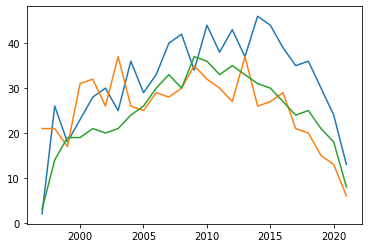

In [391]:
plt.plot(collaborative_df['Year'], collaborative_df['H Index'])
plt.plot(international_df['Year'], international_df['H Index'])
plt.plot(domestic_df['Year'], domestic_df['H Index'])

plt.show()

0     1997.0
1     1998.0
2     1999.0
3     2000.0
4     2001.0
5     2002.0
6     2003.0
7     2004.0
8     2005.0
9     2006.0
10    2007.0
11    2008.0
12    2009.0
13    2010.0
14    2011.0
15    2012.0
16    2013.0
17    2014.0
18    2015.0
19    2016.0
20    2017.0
21    2018.0
22    2019.0
23    2020.0
24    2021.0
Name: Year, dtype: float64 0      3.255764
1      8.208228
2      7.896064
3      8.544004
4      7.991066
5      7.078135
6      7.725556
7      8.188746
8     13.696285
9     10.289558
10    12.088562
11    11.231334
12    12.919871
13    14.852048
14    14.516448
15    14.356183
16    14.586904
17    13.518506
18    15.179874
19    16.057189
20    13.971399
21    14.500000
22    14.352700
23    17.507141
24    10.344080
Name: H Index, dtype: float64
0     1997.0
1     1998.0
2     1999.0
3     2000.0
4     2001.0
5     2002.0
6     2003.0
7     2004.0
8     2005.0
9     2006.0
10    2007.0
11    2008.0
12    2009.0
13    2010.0
14    2011.0
15    2012.0
16    2013

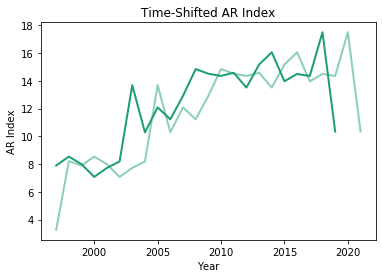

In [470]:
plt.plot(domestic_df['Year'], domestic_df['H Index'], color=c_d, linewidth=2, alpha=0.5)
print(domestic_df['Year'], domestic_df['H Index'])
plt.plot(domestic_df['Year'][0:len(domestic_df)-2], domestic_df['H Index'][2:len(domestic_df)], color=c_d, linewidth=2)
print(domestic_df['Year'][0:len(domestic_df)-2], domestic_df['H Index'][2:len(domestic_df)])
plt.title('Time-Shifted AR Index')
plt.xlabel('Year')
plt.ylabel('AR Index')
         
plt.show()

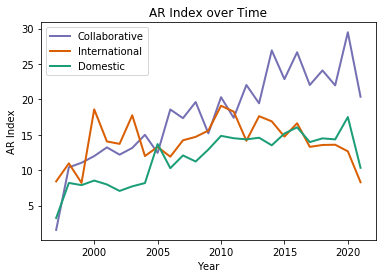

In [460]:
plt.plot(collaborative_df['Year'], collaborative_df['H Index'], color=c_c, linewidth=2, label='Collaborative')
plt.plot(international_df['Year'], international_df['H Index'], color=c_i, linewidth=2, label='International')
plt.plot(domestic_df['Year'], domestic_df['H Index'], color=c_d, linewidth=2, label='Domestic')
plt.title('AR Index over Time')
plt.xlabel('Year')
plt.ylabel('AR Index')
plt.legend()
         
plt.show()

Normalizing Citation Count and Paper Volume metrics so scales are equal across the three groups

In [372]:
from sklearn.preprocessing import MinMaxScaler

def normalize_no_zero(x):
    
    x = np.append(x, [0]).reshape(-1,1) # adding extra zero point so 
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    
    return x_scaled[0:len(x_scaled)-1] # removing extra zero point

In [373]:
domestic_df['Normalized Paper Volume'] = normalize_no_zero(np.asarray(domestic_df['Paper Volume']))
domestic_df['Normalized Aggregated Citations'] = normalize_no_zero(np.asarray(domestic_df['Aggregated Citations']))

international_df['Normalized Paper Volume'] = normalize_no_zero(np.asarray(international_df['Paper Volume']))
international_df['Normalized Aggregated Citations'] = normalize_no_zero(np.asarray(international_df['Aggregated Citations']))

collaborative_df['Normalized Paper Volume'] = normalize_no_zero(np.asarray(collaborative_df['Paper Volume']))
collaborative_df['Normalized Aggregated Citations'] = normalize_no_zero(np.asarray(collaborative_df['Aggregated Citations']))

## Plots of raw data

### Deforestation rate timeseries

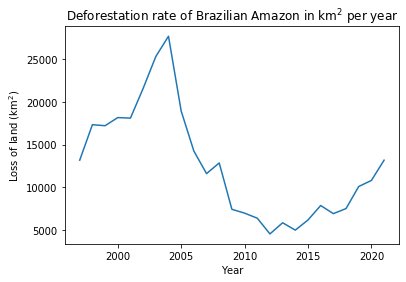

In [318]:
plt.plot(domestic_df['Year'], domestic_df['Deforestation Rate'])
plt.title(r'Deforestation rate of Brazilian Amazon in km$^2$ per year')
plt.xlabel('Year')
plt.ylabel(r'Loss of land (km$^2$)')
plt.show()

### Paper volume timeseries

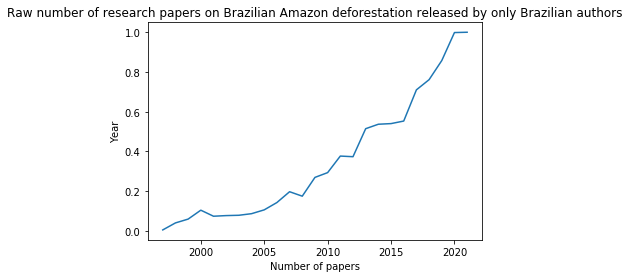

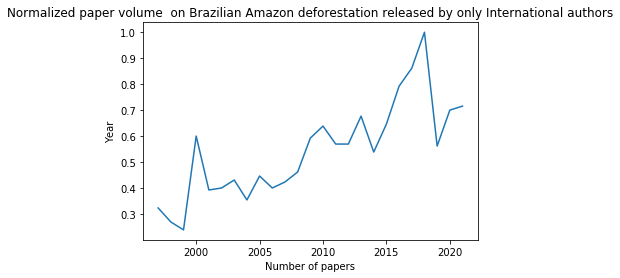

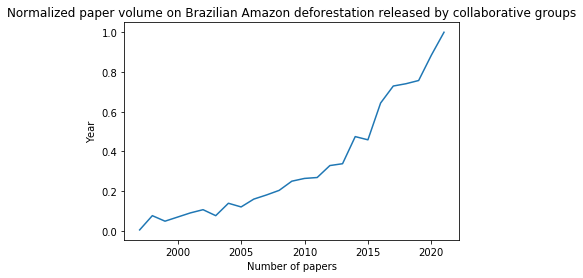

In [319]:
plt.plot(domestic_df['Year'], domestic_df['Normalized Paper Volume'])
plt.title('Raw number of research papers on Brazilian Amazon deforestation released by only Brazilian authors')
plt.xlabel('Number of papers')
plt.ylabel('Year')
plt.show()

plt.plot(international_df['Year'], international_df['Normalized Paper Volume'])
plt.title('Normalized paper volume  on Brazilian Amazon deforestation released by only International authors')
plt.xlabel('Number of papers')
plt.ylabel('Year')
plt.show()

plt.plot(collaborative_df['Year'], collaborative_df['Normalized Paper Volume'])
plt.title('Normalized paper volume on Brazilian Amazon deforestation released by collaborative groups')
plt.xlabel('Number of papers')
plt.ylabel('Year')
plt.show()

### GDP timeseries

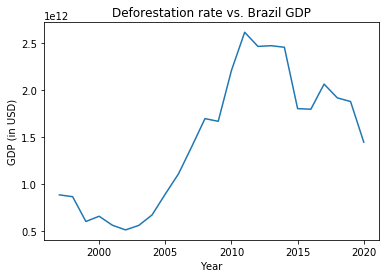

In [320]:
plt.plot(domestic_df['Year'], domestic_df['GDP'])
plt.ylabel('GDP (in USD)')
plt.xlabel('Year')
plt.title('Deforestation rate vs. Brazil GDP')
plt.show()

### Plots of each variable

In [321]:
collaborative_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'Aggregated Citations',
       'Deforestation Rate', 'H Index', 'Normalized Paper Volume',
       'Normalized Aggregated Citations'],
      dtype='object')

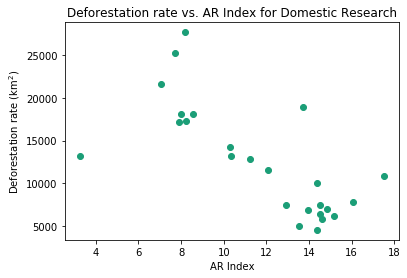

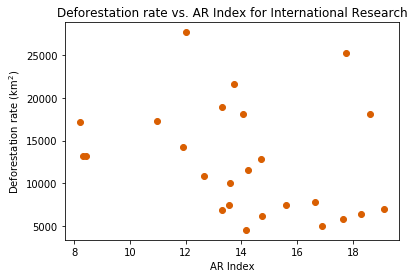

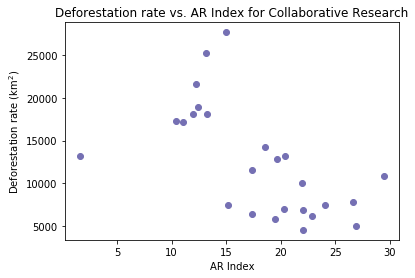

In [457]:
plt.scatter(domestic_df['H Index'], domestic_df['Deforestation Rate'], color=c_d)
plt.xlabel('AR Index')
plt.ylabel(r'Deforestation rate (km$^2$)')
plt.title('Deforestation rate vs. AR Index for Domestic Research')
plt.show()

plt.scatter(international_df['H Index'], international_df['Deforestation'], color=c_i)
plt.xlabel('AR Index')
plt.ylabel(r'Deforestation rate (km$^2$)')
plt.title('Deforestation rate vs. AR Index for International Research')
plt.show()

plt.scatter(collaborative_df['H Index'], collaborative_df['Deforestation'], color=c_c)
plt.xlabel('AR Index')
plt.ylabel(r'Deforestation rate (km$^2$)')
plt.title('Deforestation rate vs. AR Index for Collaborative Research')
plt.show()

### Making shifted variables

In [399]:
def get_shift(df, steps_back, min_year):
    
    df_shifted = pd.DataFrame({'Year': np.arange(min_year+steps_back, 2022)})
    
    deforestation_list = np.asarray(df['Deforestation Rate'])
    deforestation_list = deforestation_list[steps_back:len(deforestation_list)]
    df_shifted['Deforestation Rate'] = deforestation_list
    
    #citations_list = np.asarray(df['Normalized Aggregated Citations'])
    #citations_list = citations_list[0:len(citations_list)-steps_back]
    #df_shifted[f'Normalized Aggregated Citations {steps_back} Year Prev'] = citations_list
    
    citations_list = np.asarray(df['H Index'])
    citations_list = citations_list[0:len(citations_list)-steps_back]
    df_shifted[f'H Index {steps_back} Year Prev'] = citations_list
    
    if df.columns.contains('GDP'):
        gdp_list = np.asarray(df['GDP'])
        gdp_list = gdp_list[0:len(gdp_list)-steps_back]
        df_shifted[f'GDP {steps_back} Year Prev'] = gdp_list
        
    
    return df_shifted

In [473]:
print(get_shift(domestic_df, 1, min_year))
domestic_df

      Year  Deforestation Rate  Normalized Paper Volume 1 Year Prev  \
0   1998.0        17332.266829                             0.004808   
1   1999.0        17213.356961                             0.040064   
2   2000.0        18165.310252                             0.059295   
3   2001.0        18105.867806                             0.104167   
4   2002.0        21583.250899                             0.073718   
5   2003.0        25328.125000                             0.076923   
6   2004.0        27705.822842                             0.078526   
7   2005.0        18938.062050                             0.086538   
8   2006.0        14242.108813                             0.105769   
9   2007.0        11596.919964                             0.142628   
10  2008.0        12845.211331                             0.197115   
11  2009.0         7406.227518                             0.174679   
12  2010.0         6960.409173                             0.269231   
13  20

C:\Users\freja\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'


,Year,Deforestation,Paper Volume,Aggregated Citations,H Index,Deforestation Rate,GDP,Normalized Paper Volume,Normalized Aggregated Citations,L Index
0,1997.0,13172.144784,3,268,3.255764,13172.144784,8.832060e+11,0.004808,0.055464,3.372111
1,1998.0,17332.266829,25,1687,8.208228,17332.266829,8.637110e+11,0.040064,0.349131,5.252653
2,1999.0,17213.356961,37,1634,7.896064,17213.356961,5.996420e+11,0.059295,0.338162,5.263292
3,2000.0,18165.310252,65,1874,8.544004,18165.310252,6.554480e+11,0.104167,0.387831,5.444788
4,2001.0,18105.867806,46,1540,7.991066,18105.867806,5.599840e+11,0.073718,0.318709,5.295015
5,2002.0,21583.250899,48,1201,7.078135,21583.250899,5.097950e+11,0.076923,0.248551,5.095178
6,2003.0,25328.125000,49,1352,7.725556,25328.125000,5.582340e+11,0.078526,0.279801,5.264901
7,2004.0,27705.822842,54,1549,8.188746,27705.822842,6.692890e+11,0.086538,0.320571,5.454993
8,2005.0,18938.062050,66,3643,13.696285,18938.062050,8.916340e+11,0.105769,0.753932,6.367349
9,2006.0,14242.108813,89,2306,10.289558,14242.108813,1.107630e+12,0.142628,0.477235,5.970681


In [400]:
domestic_df_shift_list = []
international_df_shift_list = []
collaborative_df_shift_list = []

for i in range(1, 6):

    domestic_df_shift_list.append(get_shift(domestic_df, i, min_year)) 
    international_df_shift_list.append(get_shift(international_df, i, min_year)) 
    collaborative_df_shift_list.append(get_shift(collaborative_df, i, min_year)) 

C:\Users\freja\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The 'contains' method is deprecated and will be removed in a future version. Use 'key in index' instead of 'index.contains(key)'


In [359]:
'''
plt.scatter(domestic_df['Normalized Aggregated Citations'], domestic_df['Deforestation Rate'])
plt.title(f'Deforestation rate vs. Normalized Aggregated Citations for Domestic Research')
plt.xlabel('Normalized Aggregated Citations')
plt.ylabel('Deforestation rate')
plt.show()

for i in range(1, 6):
    plt.scatter(domestic_df_shift_list[i-1][f'Normalized Aggregated Citations {i} Year Prev'], domestic_df_shift_list[i-1]['Deforestation Rate'])
    plt.title(f'Deforestation rate vs. Normalized Aggregated Citations from {i} year(s) ago for Domestic Research')
    plt.xlabel('Normalized Aggregated Citations from {i} year(s) ago')
    plt.ylabel('Deforestation rate')
    plt.show()
'''

"\nplt.scatter(domestic_df['Normalized Aggregated Citations'], domestic_df['Deforestation Rate'])\nplt.title(f'Deforestation rate vs. Normalized Aggregated Citations for Domestic Research')\nplt.xlabel('Normalized Aggregated Citations')\nplt.ylabel('Deforestation rate')\nplt.show()\n\nfor i in range(1, 6):\n    plt.scatter(domestic_df_shift_list[i-1][f'Normalized Aggregated Citations {i} Year Prev'], domestic_df_shift_list[i-1]['Deforestation Rate'])\n    plt.title(f'Deforestation rate vs. Normalized Aggregated Citations from {i} year(s) ago for Domestic Research')\n    plt.xlabel('Normalized Aggregated Citations from {i} year(s) ago')\n    plt.ylabel('Deforestation rate')\n    plt.show()\n"

In [360]:
'''
plt.scatter(international_df['Normalized Aggregated Citations'], international_df['Deforestation Rate'])
plt.title(f'Deforestation rate vs. Normalized Aggregated Citations for International Research')
plt.xlabel('Normalized Aggregated Citations')
plt.ylabel('Deforestation rate')
plt.show()

for i in range(1, 6):
    plt.scatter(international_df_shift_list[i-1][f'Normalized Aggregated Citations {i} Year Prev'], international_df_shift_list[i-1]['Deforestation Rate'])
    plt.title(f'Deforestation rate vs. Normalized Aggregated Citations from {i} year(s) ago for International Research')
    plt.xlabel('Normalized Aggregated Citations from {i} year(s) ago')
    plt.ylabel('Deforestation rate')
    plt.show()
'''

"\nplt.scatter(international_df['Normalized Aggregated Citations'], international_df['Deforestation Rate'])\nplt.title(f'Deforestation rate vs. Normalized Aggregated Citations for International Research')\nplt.xlabel('Normalized Aggregated Citations')\nplt.ylabel('Deforestation rate')\nplt.show()\n\nfor i in range(1, 6):\n    plt.scatter(international_df_shift_list[i-1][f'Normalized Aggregated Citations {i} Year Prev'], international_df_shift_list[i-1]['Deforestation Rate'])\n    plt.title(f'Deforestation rate vs. Normalized Aggregated Citations from {i} year(s) ago for International Research')\n    plt.xlabel('Normalized Aggregated Citations from {i} year(s) ago')\n    plt.ylabel('Deforestation rate')\n    plt.show()\n"

In [361]:
'''

plt.scatter(collaborative_df['Normalized Aggregated Citations'], collaborative_df['Deforestation Rate'])
plt.title(f'Deforestation rate vs. Normalized Aggregated Citations for Collaborative Research')
plt.xlabel('Normalized Aggregated Citations')
plt.ylabel('Deforestation rate')
plt.show()

for i in range(1, 6):
    plt.scatter(collaborative_df_shift_list[i-1][f'Normalized Aggregated Citations {i} Year Prev'], collaborative_df_shift_list[i-1]['Deforestation Rate'])
    plt.title(f'Deforestation rate vs. Normalized Aggregated Citations from {i} year(s) ago for Collaborative Research')
    plt.xlabel('Normalized Aggregated Citations from {i} year(s) ago')
    plt.ylabel('Deforestation rate')
    plt.show()
'''


"\n\nplt.scatter(collaborative_df['Normalized Aggregated Citations'], collaborative_df['Deforestation Rate'])\nplt.title(f'Deforestation rate vs. Normalized Aggregated Citations for Collaborative Research')\nplt.xlabel('Normalized Aggregated Citations')\nplt.ylabel('Deforestation rate')\nplt.show()\n\nfor i in range(1, 6):\n    plt.scatter(collaborative_df_shift_list[i-1][f'Normalized Aggregated Citations {i} Year Prev'], collaborative_df_shift_list[i-1]['Deforestation Rate'])\n    plt.title(f'Deforestation rate vs. Normalized Aggregated Citations from {i} year(s) ago for Collaborative Research')\n    plt.xlabel('Normalized Aggregated Citations from {i} year(s) ago')\n    plt.ylabel('Deforestation rate')\n    plt.show()\n"

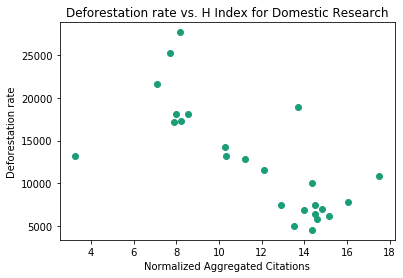

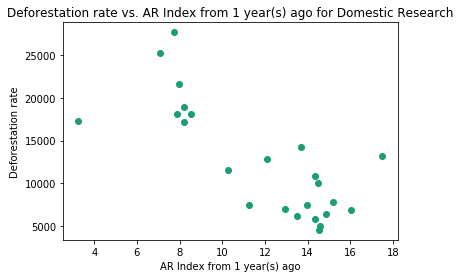

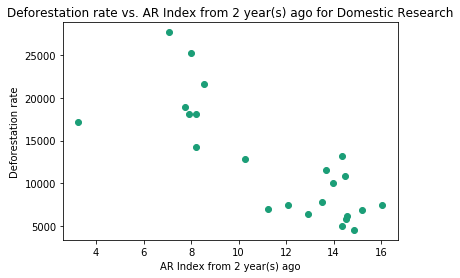

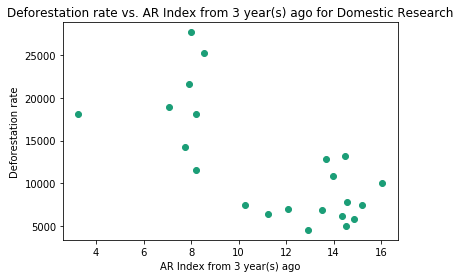

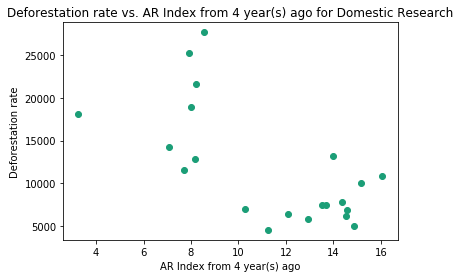

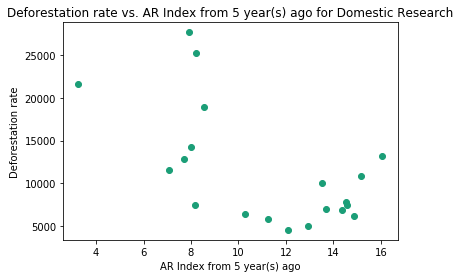

In [475]:
plt.scatter(domestic_df['H Index'], domestic_df['Deforestation Rate'], color=c_d)
plt.title(f'Deforestation rate vs. H Index for Domestic Research')
plt.xlabel('Normalized Aggregated Citations')
plt.ylabel('Deforestation rate')
plt.show()

for i in range(1, 6):
    plt.scatter(domestic_df_shift_list[i-1][f'H Index {i} Year Prev'], domestic_df_shift_list[i-1]['Deforestation Rate'], color=c_d)
    plt.title(f'Deforestation rate vs. AR Index from {i} year(s) ago for Domestic Research')
    plt.xlabel(f'AR Index from {i} year(s) ago')
    plt.ylabel('Deforestation rate')
    plt.show()

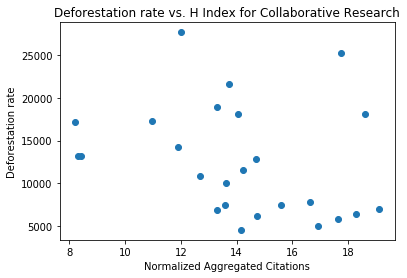

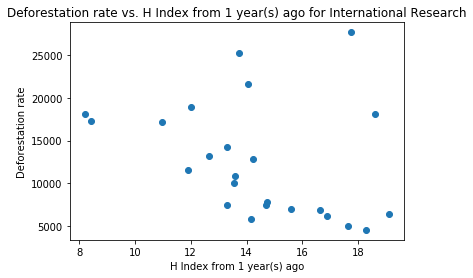

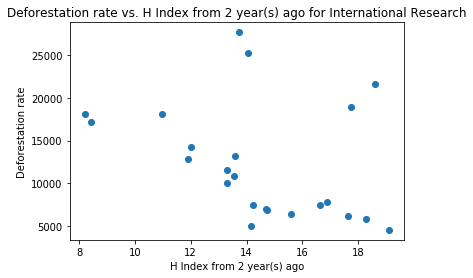

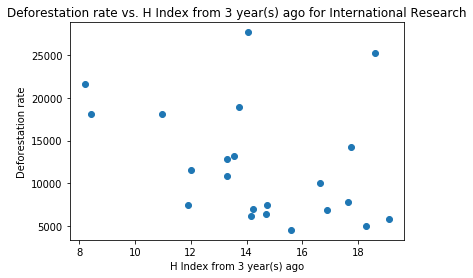

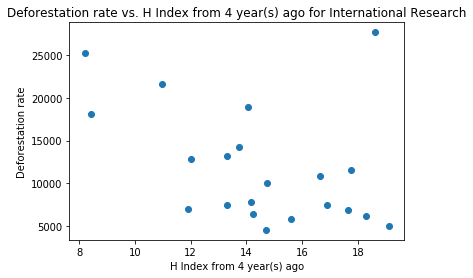

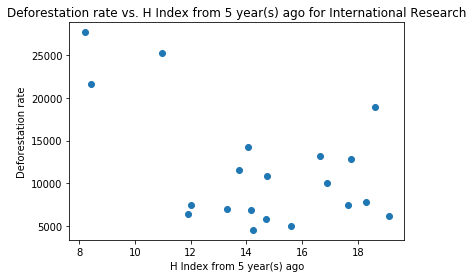

In [476]:
plt.scatter(international_df['H Index'], international_df['Deforestation Rate'])
plt.title(f'Deforestation rate vs. H Index for Collaborative Research')
plt.xlabel('Normalized Aggregated Citations')
plt.ylabel('Deforestation rate')
plt.show()

for i in range(1, 6):
    plt.scatter(international_df_shift_list[i-1][f'H Index {i} Year Prev'], international_df_shift_list[i-1]['Deforestation Rate'])
    plt.title(f'Deforestation rate vs. H Index from {i} year(s) ago for International Research')
    plt.xlabel(f'H Index from {i} year(s) ago')
    plt.ylabel('Deforestation rate')
    plt.show()

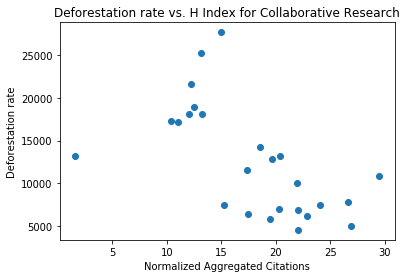

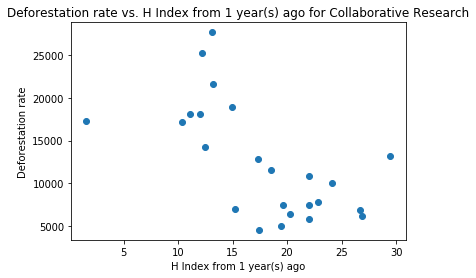

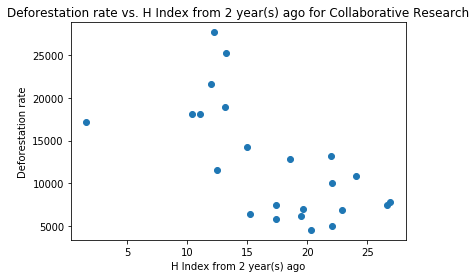

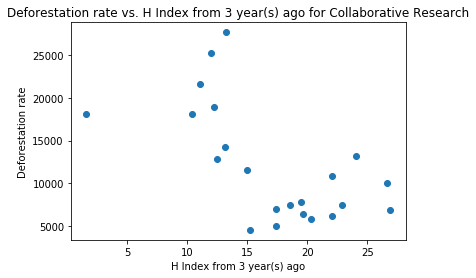

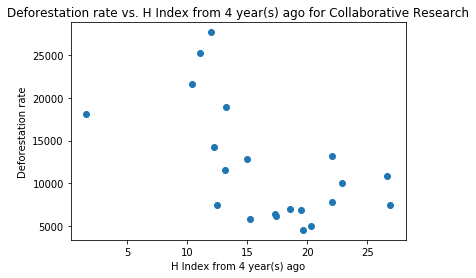

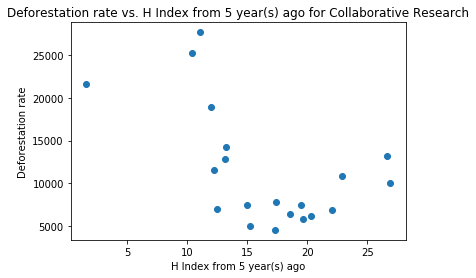

In [478]:
plt.scatter(collaborative_df['H Index'], collaborative_df['Deforestation Rate'])
plt.title(f'Deforestation rate vs. H Index for Collaborative Research')
plt.xlabel('Normalized Aggregated Citations')
plt.ylabel('Deforestation rate')
plt.show()

for i in range(1, 6):
    plt.scatter(collaborative_df_shift_list[i-1][f'H Index {i} Year Prev'], collaborative_df_shift_list[i-1]['Deforestation Rate'])
    plt.title(f'Deforestation rate vs. H Index from {i} year(s) ago for Collaborative Research')
    plt.xlabel(f'H Index from {i} year(s) ago')
    plt.ylabel('Deforestation rate')
    plt.show()

# Model fitting

In [379]:
import statsmodels.api as sm
from scipy.interpolate import interp1d
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import patsy as pt

In [79]:
domestic_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'Aggregated Citations',
       'Deforestation Rate', 'GDP', 'Normalized Paper Volume',
       'Normalized Aggregated Citations'],
      dtype='object')

## Linear regression and significance testing

In [482]:


X = collaborative_df['H Index']
y = collaborative_df['Deforestation Rate']
sk_model = sm.OLS(y, sm.add_constant(X))
results = sk_model.fit()
print(results.summary())

for i in range(1,6):
    X = collaborative_df_shift_list[i-1][f'H Index {i} Year Prev']
    y = collaborative_df_shift_list[i-1]['Deforestation Rate']
    # Create linear regression object
    sk_model = sm.OLS(y, sm.add_constant(X))
    results = sk_model.fit()
    print(results.summary())
    
    

                            OLS Regression Results                            
Dep. Variable:     Deforestation Rate   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     12.93
Date:                Tue, 26 Apr 2022   Prob (F-statistic):            0.00152
Time:                        04:39:02   Log-Likelihood:                -248.94
No. Observations:                  25   AIC:                             501.9
Df Residuals:                      23   BIC:                             504.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.366e+04   3257.384      7.263      0.0

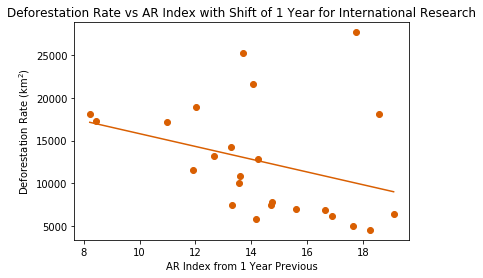

In [508]:
X = international_df_shift_list[0]['H Index 1 Year Prev']
y = international_df_shift_list[0]['Deforestation Rate']
sk_model = sm.OLS(y, sm.add_constant(X))
results = sk_model.fit()


f = interp1d(international_df_shift_list[0]['H Index 1 Year Prev'], results.predict(sm.add_constant(international_df_shift_list[0]['H Index 1 Year Prev'])), bounds_error=False)

y_preds = f(international_df_shift_list[0]['H Index 1 Year Prev'])

X_vis, y_preds = zip(*sorted(zip(international_df_shift_list[0]['H Index 1 Year Prev'], y_preds)))

plt.scatter(international_df_shift_list[0]['H Index 1 Year Prev'], international_df_shift_list[0]['Deforestation Rate'], color=c_i)

plt.plot(X_vis, y_preds, label='Predicted Rate', color=c_i)

plt.title(f'Deforestation Rate vs AR Index with Shift of 1 Year for International Research')

plt.xlabel('AR Index from 1 Year Previous')

plt.ylabel(r'Deforestation Rate (km$^2$)')

plt.show()

## Polynomial regression

In [146]:
def calc_MSE_polynomial_fit(poly_order, X_train, X_val, y_train, y_val):
    if poly_order == 1:
        X_train_poly = X_train
        X_val_poly = X_val
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.fit_transform(X_val)
    
    # Fit the polynomial regression
    regr_poly = linear_model.LinearRegression()
    regr_poly.fit(X_train_poly, y_train)
    
    # Make predictions using the linear regression
    y_pred_poly_val = regr_poly.predict(X_val_poly)
    y_pred_poly_train = regr_poly.predict(X_train_poly)
    
    # Calculate the MSE for both the val and training sets
    MSE_val = mean_squared_error(y_val, y_pred_poly_val)
    MSE_train = mean_squared_error(y_train, y_pred_poly_train)
    
    return MSE_train, MSE_val

In [201]:
def poly_order_cv(X,y,k,poly_order_max):
    mses = pd.DataFrame()
    fold = 0

    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    for train_index, val_index in kf.split(X):
        # Separate each array into respective variables
        X_fold_train = X[train_index]
        y_fold_train = y[train_index]
        X_fold_val = X[val_index]
        y_fold_val = y[val_index]
    
        # Adding a column in the X matrices for the intercept
        X_fold_train = np.array(X_fold_train).reshape(-1, 1) 
        X_fold_val = np.array(X_fold_val).reshape(-1, 1) 

        # Calculate the MSE for each polynomial order
        MSE_val_array = []
        MSE_train_array = []
        
        for poly_order in range(1,poly_order_max+1):
            [MSE_train, MSE_val] = calc_MSE_polynomial_fit(poly_order, X_fold_train, X_fold_val, y_fold_train, y_fold_val)
            MSE_val_array.append(MSE_val)
            MSE_train_array.append(MSE_train) 
        mses[fold] = MSE_val_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and the polynomial order where it occurs
    #MSE_ave_val_min = min(mses.mses_ave)
    
    # one std error rule
    min_mse_model = mses[mses.mses_ave == min(mses.mses_ave)]
    min_mse_model_folds = min_mse_model.drop(['mses_ave'], axis=1)
    one_std = np.std(min_mse_model_folds.to_numpy())
    upper_range = np.float(min(mses.mses_ave) + one_std)
    order_range = mses[mses.mses_ave < upper_range]
    optimal_order = order_range.index[0] + 1

    
    poly_order_MSE_ave_val_min = optimal_order
    MSE_ave_val_min = mses['mses_ave'].iloc[order_range.index[0]]
    
    return MSE_ave_val_min, poly_order_MSE_ave_val_min

In [202]:
def bootstrap_polynomial_sample_analysis(X,y, poly_order, x_array):
    
    x_bootstrap_min = min(X)
    x_bootstrap_max = max(X)
    
    X_reshape = np.array(X).reshape(-1, 1)

    # Generate features up to the specified polynomial order 
    if poly_order == 1:
        X_poly = X_reshape
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        X_poly = poly.fit_transform(X_reshape)
    
    # Fit the polynomial regression
    regr_poly = linear_model.LinearRegression()    
    regr_poly.fit(X_poly, y)
    
    # You do no want to extrapolate the bootstrapped regression beyond the range of the bootstrap data
    # For values below the lowest income in the bootstrap sample and above the highest income in the 
    # bootstrap sample, place NaN values. 
    entries_below_bootstrap_min = sum(x_array<x_bootstrap_min)
    y_pred_below_bootstrap_min = np.full(entries_below_bootstrap_min, np.nan)

    entries_above_bootstrap_max = sum(x_array>x_bootstrap_max)
    y_pred_above_bootstrap_max = np.full(entries_above_bootstrap_max, np.nan)

    # For entries within the bootstrap sample range, used your fitted regression to predict solar installation
    incomes_within_bootstrap_data =x_array[entries_below_bootstrap_min:(len(x_array) - entries_above_bootstrap_max)]
    #print(incomes_within_bootstrap_data)
    if poly_order == 1:
        incomes_within_bootstrap_data = incomes_within_bootstrap_data.reshape(-1, 1)
    else:
        # Transform X to appropriate polynomial
        poly = PolynomialFeatures(poly_order)
        incomes_within_bootstrap_data = poly.fit_transform(incomes_within_bootstrap_data.reshape(-1, 1))
    y_pred_within_bootstrap_data_range = regr_poly.predict(incomes_within_bootstrap_data)

    # Concatenate the predicted solar installations for all three regions (below the lowest income in the bootstrap
    # sample, within the income data in the bootstrap sample, and above the highest income in the bootstrap sample)
    y_pred = np.concatenate((y_pred_below_bootstrap_min, y_pred_within_bootstrap_data_range, y_pred_above_bootstrap_max))

    return y_pred

In [211]:
def bootstrap_polynomial_analysis(df, variable_of_interest, response, poly_order_max, k):
    X = df[variable_of_interest]
    X = X.reset_index(drop = True)
    y = df[response]
    y = y.reset_index(drop = True)
    
    x_array = np.linspace(min(X), max(X), 100)
        
    # first determine the best polynomial order using cross-validation
    MSE_ave_val_min, poly_order_MSE_ave_val_min = poly_order_cv(X,y,k,poly_order_max)
    print('The average MSE of the valuation sets:', MSE_ave_val_min)
    print('This occured when using a polynomial of order:', poly_order_MSE_ave_val_min)
    
    # bootstrap analysis given this selected polynomial order
    y_pred_bootstrap = pd.DataFrame()
    for i in range(0,1000):
        df_bootstrap = df.sample(n=len(df), replace=True)
        X_bootstrap  = df_bootstrap[variable_of_interest]
        X_bootstrap  = X_bootstrap.reset_index(drop = True)
        y_bootstrap  = df_bootstrap[response]
        y_bootstrap  = y_bootstrap.reset_index(drop = True)

        y_pred = bootstrap_polynomial_sample_analysis(X_bootstrap, y_bootstrap, poly_order_MSE_ave_val_min, x_array)
        y_pred_bootstrap[i] = y_pred
        
    y_pred_bootstrap_summary = pd.DataFrame()
    y_pred_bootstrap_summary['median'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 50) for i in range(0, len(x_array))]  # median is 50th percentile
    y_pred_bootstrap_summary['95_CI_high'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 97.5) for i in range(0, len(x_array))]
    y_pred_bootstrap_summary['95_CI_low'] = [np.nanpercentile(y_pred_bootstrap.loc[i], 2.5) for i in range(0, len(x_array))]

    
    return y_pred_bootstrap_summary, x_array, MSE_ave_val_min, poly_order_MSE_ave_val_min

In [483]:
def plot_polynomial_bootstrap_analysis(domestic_df, international_df, collaborative_df, variable_of_interest, k):
    
    response = 'Deforestation Rate'
    poly_order_max = 5
    #k = 10
    
    #print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic, MSE_min_domestic, optimal_poly_order_domestic] = bootstrap_polynomial_analysis(domestic_df, variable_of_interest, response, poly_order_max, k)
    #print('International Research:')
    [y_bootstrap_summary_international, x_array_international, MSE_min_international, optimal_poly_order_international] = bootstrap_polynomial_analysis(international_df, variable_of_interest, response, poly_order_max, k)
    #print('Collaborative Research:')
    [y_bootstrap_summary_collaborative, x_array_collaborative, MSE_min_collaborative, optimal_poly_order_collaborative] = bootstrap_polynomial_analysis(collaborative_df, variable_of_interest, response, poly_order_max, k)
    
    
    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5, color=c_d)
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], c_d)
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = c_d, alpha = 0.5, label='domestic')
    
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5, color=c_i)
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], c_i)
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = c_i, alpha = 0.5, label='international')
   
    plt.scatter(collaborative_df[variable_of_interest], collaborative_df[response], s=5, color=c_c)
    plt.plot(x_array_collaborative, y_bootstrap_summary_collaborative['median'], c_c)
    plt.fill_between(x_array_collaborative, y_bootstrap_summary_collaborative['95_CI_low'], y_bootstrap_summary_collaborative['95_CI_high'], facecolor = c_c, alpha = 0.5, label='collaborative')
   
    plt.xlabel(variable_of_interest)
    plt.ylabel(f'Deforestation Rate (km$^2$ per Year)')
    plt.title(f'Deforestation Rate vs. {variable_of_interest}')
    plt.legend()
    plt.show()

### Polynomial Bootstrap analysis for Normalized Aggregated Citations

In [213]:
domestic_df.columns

Index(['Year', 'Deforestation', 'Paper Volume', 'Aggregated Citations',
       'Deforestation Rate', 'GDP', 'Normalized Paper Volume',
       'Normalized Aggregated Citations'],
      dtype='object')

The average MSE of the valuation sets: 26746664.918658603
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 43945688.694652244
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 33347379.35623603
This occured when using a polynomial of order: 1


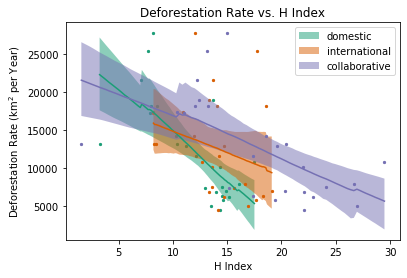

In [489]:
#plot_polynomial_bootstrap_analysis(domestic_df, international_df, collaborative_df, 'Normalized Aggregated Citations')

plot_polynomial_bootstrap_analysis(domestic_df, international_df, collaborative_df, 'H Index', len(domestic_df))

Plots for presentation

The average MSE of the valuation sets: 21214499.800928958
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 31476147.36642828
This occured when using a polynomial of order: 1


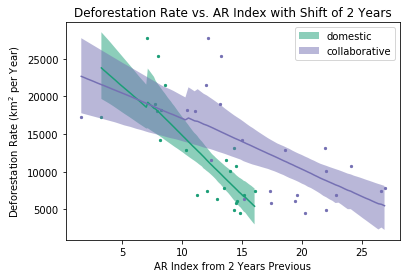

The average MSE of the valuation sets: 43825969.29049292
This occured when using a polynomial of order: 1


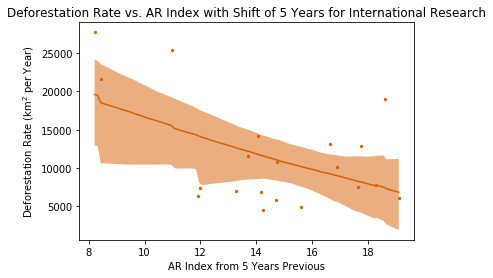

In [518]:
response = 'Deforestation Rate'
poly_order_max = 5


variable_of_interest = 'H Index 2 Year Prev'

[y_bootstrap_summary_domestic, x_array_domestic, MSE_min_domestic, optimal_poly_order_domestic] = bootstrap_polynomial_analysis(domestic_df_shift_list[1], variable_of_interest, response, poly_order_max, len(domestic_df_shift_list[1]))

plt.scatter(domestic_df_shift_list[1][variable_of_interest], domestic_df_shift_list[1][response], s=5, color=c_d)
plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], c_d)
plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = c_d, alpha = 0.5, label='domestic')
plt.xlabel('AR Index from 2 Years Previous')
plt.ylabel(f'Deforestation Rate (km$^2$ per Year)')
plt.title(f'Deforestation Rate vs. AR Index with Shift of 2 Years for Domestic Research')


[y_bootstrap_summary_collaborative, x_array_collaborative, MSE_min_collaborative, optimal_poly_order_collaborative] = bootstrap_polynomial_analysis(collaborative_df_shift_list[1], variable_of_interest, response, poly_order_max, len(collaborative_df_shift_list[1]))
plt.scatter(collaborative_df_shift_list[1][variable_of_interest], domestic_df_shift_list[1][response], s=5, color=c_c)
plt.plot(x_array_collaborative, y_bootstrap_summary_collaborative['median'], c_c)
plt.fill_between(x_array_collaborative, y_bootstrap_summary_collaborative['95_CI_low'], y_bootstrap_summary_collaborative['95_CI_high'], facecolor = c_c, alpha = 0.5, label='collaborative')
plt.xlabel('AR Index from 2 Years Previous')
plt.ylabel(f'Deforestation Rate (km$^2$ per Year)')
plt.title(f'Deforestation Rate vs. AR Index with Shift of 2 Years')
plt.legend()
plt.show()


variable_of_interest = 'H Index 5 Year Prev'
[y_bootstrap_summary_international, x_array_international, MSE_min_international, optimal_poly_order_international] = bootstrap_polynomial_analysis(international_df_shift_list[4], variable_of_interest, response, poly_order_max, len(international_df_shift_list[4]))
plt.scatter(international_df_shift_list[4][variable_of_interest],international_df_shift_list[4][response], s=5, color=c_i)
plt.plot(x_array_international, y_bootstrap_summary_international['median'], c_i)
plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = c_i, alpha = 0.5, label='domestic')
plt.xlabel('AR Index from 5 Years Previous')
plt.ylabel(f'Deforestation Rate (km$^2$ per Year)')
plt.title(f'Deforestation Rate vs. AR Index with Shift of 5 Years for International Research')
plt.show()

The average MSE of the valuation sets: 34410431.42016308
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 38405172.11956274
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 43825969.29049292
This occured when using a polynomial of order: 1


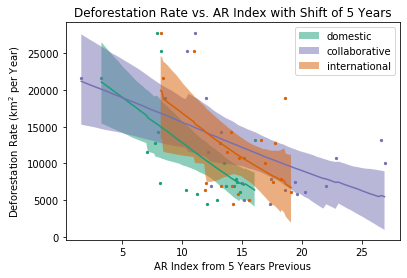

In [519]:
variable_of_interest = 'H Index 5 Year Prev'


[y_bootstrap_summary_domestic, x_array_domestic, MSE_min_domestic, optimal_poly_order_domestic] = bootstrap_polynomial_analysis(domestic_df_shift_list[4], variable_of_interest, response, poly_order_max, len(domestic_df_shift_list[4]))

plt.scatter(domestic_df_shift_list[4][variable_of_interest], domestic_df_shift_list[4][response], s=5, color=c_d)
plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], c_d)
plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = c_d, alpha = 0.5, label='domestic')

[y_bootstrap_summary_collaborative, x_array_collaborative, MSE_min_collaborative, optimal_poly_order_collaborative] = bootstrap_polynomial_analysis(collaborative_df_shift_list[4], variable_of_interest, response, poly_order_max, len(collaborative_df_shift_list[4]))
plt.scatter(collaborative_df_shift_list[4][variable_of_interest], domestic_df_shift_list[4][response], s=5, color=c_c)
plt.plot(x_array_collaborative, y_bootstrap_summary_collaborative['median'], c_c)
plt.fill_between(x_array_collaborative, y_bootstrap_summary_collaborative['95_CI_low'], y_bootstrap_summary_collaborative['95_CI_high'], facecolor = c_c, alpha = 0.5, label='collaborative')

[y_bootstrap_summary_international, x_array_international, MSE_min_international, optimal_poly_order_international] = bootstrap_polynomial_analysis(international_df_shift_list[4], variable_of_interest, response, poly_order_max, len(international_df_shift_list[4]))
plt.scatter(international_df_shift_list[4][variable_of_interest],international_df_shift_list[4][response], s=5, color=c_i)
plt.plot(x_array_international, y_bootstrap_summary_international['median'], c_i)
plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = c_i, alpha = 0.5, label='international')
plt.xlabel('AR Index from 5 Years Previous')
plt.ylabel(f'Deforestation Rate (km$^2$ per Year)')
plt.title(f'Deforestation Rate vs. AR Index with Shift of 5 Years')
plt.legend()
plt.show()

### For time lag

In [485]:
def timelag_analysis_polynomial_bootstrap(df_shift_list):
    
    response = 'Deforestation Rate'
    poly_order_max = 3
    
    MSE_list = []
    optimal_poly_list = []
    
    for i in range(1, 6):
        k = len(df_shift_list[i-1])
        #variable_of_interest = f'Normalized Aggregated Citations {i} Year Prev'
        variable_of_interest = f'H Index {i} Year Prev'
        [y_bootstrap_summary, x_array, MSE_min, optimal_poly_order] = bootstrap_polynomial_analysis(df_shift_list[i-1], variable_of_interest, response, poly_order_max, k)
        MSE_list.append(MSE_min)
        optimal_poly_list.append(optimal_poly_order)
        
    timelag_analysis_df = pd.DataFrame({'Lag': np.arange(1, 6), 'MSE': MSE_list, 'optimal poly order': optimal_poly_list})    
    
    return timelag_analysis_df

In [486]:
domestic_timelag_analysis = timelag_analysis_polynomial_bootstrap(domestic_df_shift_list)
international_timelag_analysis = timelag_analysis_polynomial_bootstrap(international_df_shift_list)
collaborative_timelag_analysis = timelag_analysis_polynomial_bootstrap(collaborative_df_shift_list)

The average MSE of the valuation sets: 22933679.285448384
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 21214499.800928958
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 27659639.375922736
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 30707898.21133686
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 34410431.42016308
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 44860575.26342214
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 44395218.856534906
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 47113337.252255864
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 48155258.15243094
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 43

In [487]:
def print_timelag_analysis(timelag_analysis_df):
    
    best_row = timelag_analysis_df.iloc[timelag_analysis_df['MSE'].idxmin()]
    min_MSE = best_row['MSE']
    best_poly = best_row['optimal poly order']
    optimal_lag = best_row['Lag']
    
    print(f'Optimal lag: {optimal_lag}')
    print(f'Occured with polynomial order {best_poly}')
    
    return min_MSE, best_poly, optimal_lag

print_timelag_analysis(domestic_timelag_analysis)
print_timelag_analysis(international_timelag_analysis)
print_timelag_analysis(collaborative_timelag_analysis)

Optimal lag: 2.0
Occured with polynomial order 1.0
Optimal lag: 5.0
Occured with polynomial order 1.0
Optimal lag: 2.0
Occured with polynomial order 1.0


(31476147.36642828, 1.0, 2.0)

1
The average MSE of the valuation sets: 22933679.285448384
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 44860575.26342214
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 31786985.84080102
This occured when using a polynomial of order: 1


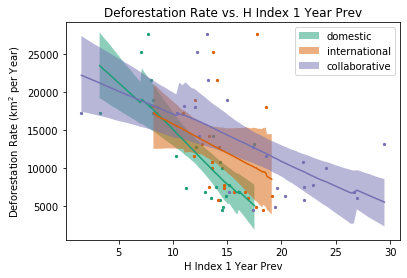

2
The average MSE of the valuation sets: 21214499.800928958
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 44395218.856534906
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 31476147.36642828
This occured when using a polynomial of order: 1


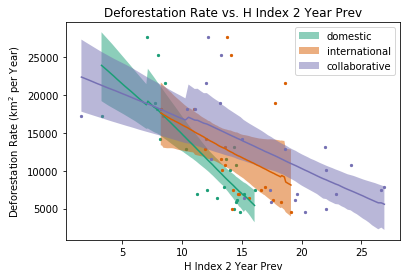

3
The average MSE of the valuation sets: 27659639.375922736
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 47113337.252255864
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 33197295.494679045
This occured when using a polynomial of order: 1


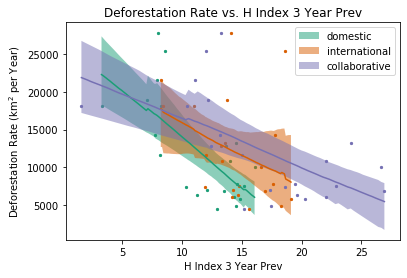

4
The average MSE of the valuation sets: 30707898.21133686
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 48155258.15243094
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 36067707.92334144
This occured when using a polynomial of order: 1


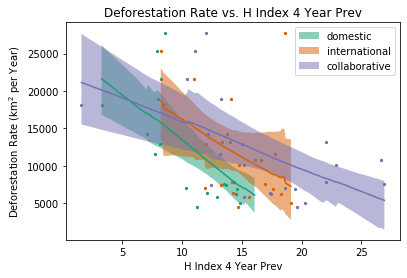

5
The average MSE of the valuation sets: 34410431.42016308
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 43825969.29049292
This occured when using a polynomial of order: 1
The average MSE of the valuation sets: 38405172.11956274
This occured when using a polynomial of order: 1


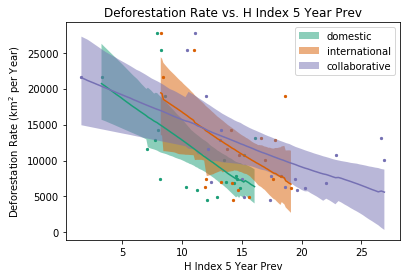

In [488]:
for i in range(1,6):
    print(i)
    #variable_of_interest = f'Normalized Aggregated Citations {i} Year Prev'
    k = len(domestic_df_shift_list[i-1])
    variable_of_interest = f'H Index {i} Year Prev'
    plot_polynomial_bootstrap_analysis(domestic_df_shift_list[i-1], international_df_shift_list[i-1], collaborative_df_shift_list[i-1], variable_of_interest, k)
    

In [156]:
for i in range(1,6):
    response = 'Deforestation Rate'
    poly_order_max = 5
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = bootstrap_polynomial_analysis(domestic_df_shift_list[i-1], variable_of_interest, response, poly_order_max, k)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = bootstrap_polynomial_analysis(international_df, variable_of_interest, response, poly_order_max, k)
    print('Collaborative Research:')
    [y_bootstrap_summary_collaborative, x_array_collaborative] = bootstrap_polynomial_analysis(collaborative_df, variable_of_interest, response, poly_order_max, k)
    
    domestic_df_shift_list, international_df_shift_list, collaborative_df_shift_list
    

Domestic Research:


KeyError: 'Normalized Aggregated Citations 5 Year Prev'

### Natural splines

In [183]:
def confidence_interval(X, y, y_pred):
    # Covariance of coefficient estimates
    mse = np.sum(np.square(y_pred - y)) / y.size
    cov = mse * np.linalg.inv(X.T @ X)
    # Alternatively the covariance could be found using StatsModels:
    # cov = model.cov_params()

    # Calculate variance of f(x)
    var_f = np.diagonal((X @ cov) @ X.T)

    # Derive standard error of f(x) from variance
    se       = np.sqrt(abs(var_f))
    conf_int = 2*se

    return conf_int


def nat_spline_degree_of_freedom_cv_with_CI(df, variable_of_interest, response, k, degree, degree_of_freedom_max):
    
    # DataFrame to store the MSE values for each fold and d.o.f
    mses = pd.DataFrame()
    
    # creating folds for cross-validation
    fold = 0
    kf = KFold(n_splits=k, shuffle=True, random_state=0) 
    
    for train_index, val_index in kf.split(df):
        
        # Separate into training and validation sets
        df_train = np.asarray(df)[train_index]
        df_train = pd.DataFrame(df_train, columns=df.columns)
        df_val = np.asarray(df)[val_index]
        df_val = pd.DataFrame(df_val, columns=df.columns)

        # Calculate the MSE for each degree of freedom
        MSE_array = []
        # minimum: spline degree+1, maximum: max. degree of freedom specified
        for deg_free in range(degree + 1, degree_of_freedom_max + 1):
            
            # Use patsy to generate entire matrix of basis functions for train and validation sets
            string = f'cr({variable_of_interest}, df=' + str(deg_free)+')'
            X_train_pt = pt.dmatrix(string, df_train)
            X_val_pt = pt.dmatrix(string, df_val)
            
            # extracting y-values from dataframes for train and validation sets
            y_train = df_train[response]
            y_val = df_val[response]
            
            # Fit linear regression model on training data
            model = sm.OLS(y_train, X_train_pt).fit(disp=0)
            
            # get predicted values from validation set
            y_pred = model.predict(X_val_pt)
        
            # computing MSE value and putting into arrays
            MSE_val = mean_squared_error(y_val, y_pred)
            MSE_array.append(MSE_val)
            
            
        mses[fold] = MSE_array
        fold = fold+1

    # Average the MSE across folds
    mses['mses_ave'] = mses.mean(axis=1)

    # Determine the minimum average MSE and the degree of freedom where it occurs
    MSE_ave_min = min(mses.mses_ave)
    degree_of_freedom_MSE_ave_min = mses['mses_ave'].idxmin()+degree+1
    
    
    # Calculate the 95% confidence interval
    string = f'bs({variable_of_interest}, df=' + str(degree_of_freedom_MSE_ave_min) + ', degree=' + str(degree) + ', include_intercept=True)'
    X = pt.dmatrix(string, df)
    y = np.asarray(df[response])

    # Fit the regression model
    model = sm.OLS(y, X).fit(disp=0)
    y_pred = model.predict(X)
    conf_int = confidence_interval(X, y, y_pred)
    
    
    
    return MSE_ave_min, degree_of_freedom_MSE_ave_min, conf_int, y_pred

In [182]:
variable_of_interest = 'Normalized Aggregated Citations'
response = 'Deforestation Rate'
k = 5
degree = 3
degree_of_freedom_max = 10

MSE_ave_min_domestic, degree_of_freedom_MSE_ave_min_domestic, conf_int_domestic, y_pred_domestic = nat_spline_degree_of_freedom_cv_with_CI(domestic_df, variable_of_interest, response, k, degree, degree_of_freedom_max)
MSE_ave_min_international, degree_of_freedom_MSE_ave_min_interational, conf_int_international, y_pred_international = nat_spline_degree_of_freedom_cv_with_CI(international_df, variable_of_interest, response, k, degree, degree_of_freedom_max)

domestic_splines_df = pd.DataFrame({'x': domestic_df[variable_of_interest], 'y': y_pred_domestic, 'conf_int': conf_int_domestic})
domestic_splines_df = domestic_splines_df.sort_values(by=['x'], axis=0)
domestic_splines_df = domestic_splines_df.reset_index(drop=True)

international_splines_df = pd.DataFrame({'x': international_df[variable_of_interest], 'y': y_pred_international, 'conf_int': conf_int_international})
international_splines_df = international_splines_df.sort_values(by=['x'], axis=0)
international_splines_df = international_splines_df.reset_index(drop=True)

plt.scatter(domestic_df[variable_of_interest], domestic_df[response], color='b')
plt.plot(domestic_splines_df['x'], domestic_splines_df['y'], 'b')
plt.fill_between(domestic_splines_df['x'], domestic_splines_df['y']-domestic_splines_df['conf_int'], domestic_splines_df['y']+domestic_splines_df['conf_int'], facecolor='b', alpha=0.5, label='Domestic')

plt.scatter(international_df[variable_of_interest], international_df[response], color='m')
plt.plot(international_splines_df['x'], international_splines_df['y'], 'm')
plt.fill_between(international_splines_df['x'], international_splines_df['y']-international_splines_df['conf_int'], international_splines_df['y']+international_splines_df['conf_int'], facecolor='m', alpha=0.5, label='International')

plt.xlabel(variable_of_interest)
plt.ylabel('Deforestation Rate (acres(?) per Year)')
plt.title(f'Deforestation Rate vs. {variable_of_interest}')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
def plot_polynomial_bootstrap_analysis(domestic_df, international_df, variable_of_interest):
    
    response = 'Deforestation'
    degree_of_freedom_max = 10
    degree = 3
    k = 5
    
    print('Domestic Research:')
    [y_bootstrap_summary_domestic, x_array_domestic] = nat_spline_degree_of_freedom_cv_with_CI(domestic_df, variable_of_interest, response, k, degree, degree_of_freedom_max)
    print('International Research:')
    [y_bootstrap_summary_international, x_array_international] = nat_spline_degree_of_freedom_cv_with_CI(international_df, variable_of_interest, response, k, degree, degree_of_freedom_max)

    plt.scatter(domestic_df[variable_of_interest], domestic_df[response], s=5, color='b')
    plt.plot(x_array_domestic, y_bootstrap_summary_domestic['median'], 'b')
    plt.fill_between(x_array_domestic, y_bootstrap_summary_domestic['95_CI_low'], y_bootstrap_summary_domestic['95_CI_high'], facecolor = 'b', alpha = 0.5, label='domestic')
    
    plt.scatter(international_df[variable_of_interest], international_df[response], s=5, color='m')
    plt.plot(x_array_international, y_bootstrap_summary_international['median'], 'm')
    plt.fill_between(x_array_international, y_bootstrap_summary_international['95_CI_low'], y_bootstrap_summary_international['95_CI_high'], facecolor = 'm', alpha = 0.5, label='international')
   
    plt.xlabel(variable_of_interest)
    plt.ylabel('Deforestation Rate (acres(?) per Year)')
    plt.title(f'Deforestation Rate vs. {variable_of_interest}')
    plt.legend()
    plt.show()

In [ ]:
plot_polynomial_bootstrap_analysis(domestic_df, international_df, 'Normalized_Citations')

                            OLS Regression Results                            
Dep. Variable:     Deforestation Rate   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.625
Date:                Tue, 26 Apr 2022   Prob (F-statistic):              0.119
Time:                        02:33:22   Log-Likelihood:                -243.47
No. Observations:                  24   AIC:                             490.9
Df Residuals:                      22   BIC:                             493.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.328e+04   6

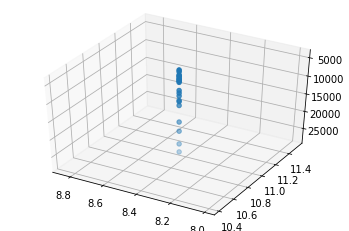

In [424]:
import statsmodels.api as sm


# Fit the simple linear regression
X = pd.DataFrame({'Domestic Research': domestic_df_shift_list[1]['H Index 2 Year Prev'], 'International Research': international_df['H Index'][0:len(international_df)-2]})
y = domestic_df_shift_list[1]['Deforestation Rate']

for i in range(1,6):
    X = international_df_shift_list[i-1][f'H Index {i} Year Prev']
    y = international_df_shift_list[i-1]['Deforestation Rate']
    # Create linear regression object
    sk_model = sm.OLS(y, sm.add_constant(X))
    results = sk_model.fit()

    print(results.summary())

from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[0], X[1], y)
#ax.plot3D(X['Normalized_Citations'], X['Normalized_Volume'], sk_model)
ax.view_init(-140, 60)